<h2 align = "center">Sprawozdanie mofit</h2>
<h4 align="center">Łukasz Puchała, Karol Grzywa</h4>

In [1]:
import numpy as np
from numba import njit
import math
import matplotlib.pyplot as plt
from math import sin, cos, pi, e, exp
from scipy.linalg import eigh
import Utilis

m = 0.067 # m0
h = 1
at2meV = 27211.6
omega = 10/at2meV
ab = 0.05292
j = 0 + 1j
at2s = 2.42e-5*1e-12

L = 100/ab
N = 2
a = L/(2*N)

In [2]:
grid_N2_L100 = Utilis.ReadFile('Files/wezly_N_2_L_100.dat')


<h2 align = "center">generowanie macierzy lokalnych </h2>

In [3]:
grid_N2_L100 = Utilis.ReadFile('Files/wezly_N_2_L_100.dat')
wezly = np.array(grid_N2_L100)

In [4]:
nlg_N2_l100 = Utilis.ReadFile('Files/nlg_N_2_L_100.dat.txt')
nlg = np.array(nlg_N2_l100)

In [5]:
# funkcja, co bierze poz. wezla naroznego elementu k o loklanym nr i
print( Utilis.xy_nlg(1, 1, nlg, wezly) )
# wspóółrzędne rzeczywiste punktu 
print( 'wsp', Utilis.xryr(k= 1, ksi1= 0, ksi2= 0, nlg= nlg, wezly= wezly) )
j,i,s = Utilis.Sloc(a)
print(s)
print(j)
print(i)

(-50.0, -50.0)
wsp (-37.5, -37.5)
[ 3967.50807674  -991.87701918  -991.87701918   247.9692548
  1983.75403837  -495.93850959  1983.75403837  -495.93850959
   991.87701918  -991.87701918  3967.50807674   247.9692548
  -991.87701918  1983.75403837  1983.75403837  -495.93850959
  -495.93850959   991.87701918  -991.87701918   247.9692548
  3967.50807674  -991.87701918  -495.93850959  -495.93850959
  1983.75403837  1983.75403837   991.87701918   247.9692548
  -991.87701918  -991.87701918  3967.50807674  -495.93850959
  1983.75403837  -495.93850959  1983.75403837   991.87701918
  1983.75403837  1983.75403837  -495.93850959  -495.93850959
 15870.03230694   991.87701918   991.87701918 -3967.50807674
  7935.01615347  -495.93850959  1983.75403837  -495.93850959
  1983.75403837   991.87701918 15870.03230694 -3967.50807674
   991.87701918  7935.01615347  1983.75403837  -495.93850959
  1983.75403837  -495.93850959   991.87701918 -3967.50807674
 15870.03230694   991.87701918  7935.01615347  -495.938

<h2>Wyznaczanie macierzy lokalnych</h2>

In [6]:
Sgiven = Utilis.ReadFile("./Files/S_loc_N2_L100.dat.txt")
Tgiven = Utilis.ReadFile("./Files/T_loc_N2_L100.dat.txt")
V11given = Utilis.ReadFile("./Files/V_loc_N2_L100_element_11.dat.txt")
jt,it,T = Utilis.Tmatrix(m,0.0001)
js,Is,S = Utilis.Sloc(a)
jv,iv,V = Utilis.Vkmatrix(11,a,m,omega,nlg,wezly)
print(V)
Tdif = T - np.array(Tgiven[2])
Sdiff = S - np.array(Sgiven[2])
Vdiff = V - np.array(V11given[2])


[ 0.28613223 -0.39343182 -0.39343182  0.17883264 -0.21459917 -0.10729959
 -0.21459917 -0.10729959 -0.28613223 -0.39343182  3.29052065  0.17883264
 -1.14452892  1.78832644  1.28759504 -0.10729959 -0.60803099  0.71533058
 -0.39343182  0.17883264  3.29052065 -1.14452892 -0.10729959 -0.60803099
  1.78832644  1.28759504  0.71533058  0.17883264 -1.14452892 -1.14452892
  6.29490907 -0.60803099  3.29052065 -0.60803099  3.29052065  1.71679338
 -0.21459917  1.78832644 -0.10729959 -0.60803099  5.15038015  0.71533058
 -0.28613223 -2.57519008  1.14452892 -0.10729959  1.28759504 -0.60803099
  3.29052065  0.71533058 17.16793383 -2.57519008  1.71679338  9.15623138
 -0.21459917 -0.10729959  1.78832644 -0.60803099 -0.28613223 -2.57519008
  5.15038015  0.71533058  1.14452892 -0.10729959 -0.60803099  1.28759504
  3.29052065 -2.57519008  1.71679338  0.71533058 17.16793383  9.15623138
 -0.28613223  0.71533058  0.71533058  1.71679338  1.14452892  9.15623138
  1.14452892  9.15623138 36.62492551]


<h2>Rysunek odjętych od siebie macierzy wyznaczonych i danych</h2>

In [7]:
import plotly.express as px
px.imshow(Tdif.reshape((9, 9)), x=np.unique(it), y=np.unique(jt), title='Tdif', color_continuous_scale='Viridis').show()
px.imshow(Sdiff.reshape((9, 9)), x=np.unique(Is), y=np.unique(js), title='Sdiff', color_continuous_scale='Plasma').show()
px.imshow(Vdiff.reshape((9, 9)), x=np.unique(iv), y=np.unique(jv), title='Vdiff', color_continuous_scale='Blues').show()

# Macierze globalne

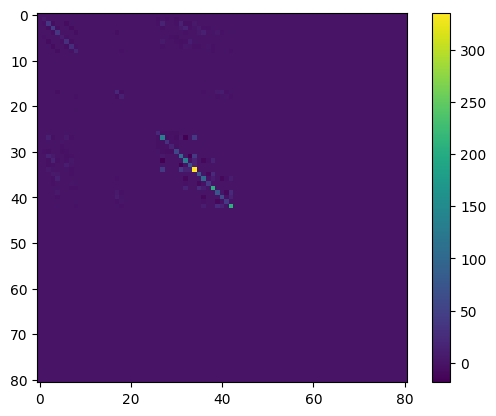

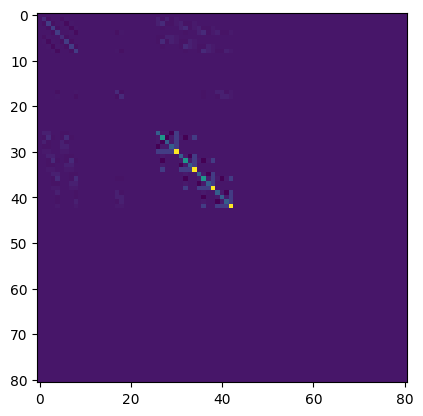

In [ ]:
S, H = Utilis.Gmatrix(N, nlg, wezly, a)

px.imshow(S)
px.imshow(H)